In [1]:
import cv2
import numpy as np  
import os
import matplotlib.pyplot as plt
import pywt
import pywt.data
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

In [2]:
imageFolder = "./image/edof/10x_40deg_step20um/"  # 이미지 폴더 경로 설정
outputFolder = "./image/edof/result"  # 결과 이미지 저장 폴더 경로 설정

# 결과 이미지 저장 폴더가 없으면 생성하기
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)

# 이미지 폴더에서 파일 목록 가져오기
fileList = os.listdir(imageFolder)
imgNameFiles = [file for file in fileList if file.endswith('.png')]
# 파일들을 시간순으로 정렬
sortedImgNameFiles = sorted(imgNameFiles, key=lambda x: os.path.getmtime(os.path.join(imageFolder, x)))



In [3]:
# 이미지를 스크립트에서 바로 확인
def show_image(image):
    # 값 범위 정규화 (예: [0,255] -> [0,1])
    # image = image / 255.0
    # 이미지 출력
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap='gray')
    # plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    # 축 비율 고정
    plt.axis('equal')
    plt.show()

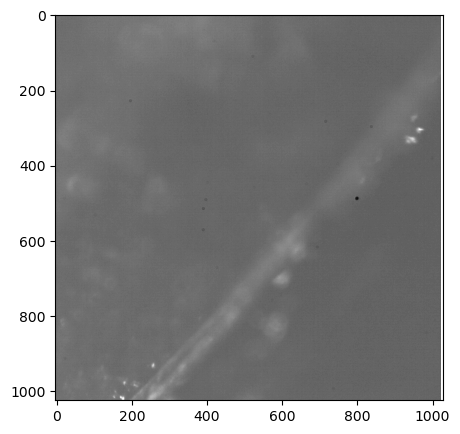

91

In [4]:
img_path = os.path.join(imageFolder,  sortedImgNameFiles[0])
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_gray = img_gray[1000-24:,800-24:-200]
show_image(img_gray)
img_gray.min()

In [5]:
imgStack = []
for imgName in sortedImgNameFiles:
    imgPath = os.path.join(imageFolder, imgName)
    imgGray = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    imgGray = imgGray[1000-24:,800-24:-200]
    if imgGray is not None:
        imgStack.append(imgGray)

In [6]:
# 'img' 폴더가 없다면 생성합니다.
if not os.path.exists('img'):
    os.makedirs('img')

# imgStack의 각 이미지를 저장합니다.
for i, img in enumerate(imgStack):
    # 파일 경로와 이름을 지정합니다. 여기서는 일련번호로 파일 이름을 지정하고자 합니다.
    filename = f'img/image_{i}.bmp'

    # 이미지를 'img' 폴더에 저장합니다.
    cv2.imwrite(filename, img)

In [7]:
print(len(imgStack))
print(imgStack[0].shape)
print(type(imgStack[0]))

41
(1024, 1024)
<class 'numpy.ndarray'>


In [11]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [ ]:
img = imgStack[20]
shape = img.shape

maxLevel = 7 # how many levels of decomposition to draw

coeffs = pywt.wavedec2(img, 'cgau1', mode='periodization', level=maxLevel)
# coeffsArr, slices = pywt.coeffs_to_array(coeffs)

# normalize each coefficient array independently for better visibility
coeffs[0] /= np.abs(coeffs[0]).max()
for detailLevel in range(maxLevel):
    coeffs[detailLevel + 1] = [d/np.abs(d).max() for d in coeffs[detailLevel + 1]]

coeffsArr, slices = pywt.coeffs_to_array(coeffs)
coeffsArrAbs = np.abs(coeffsArr)

plt.imshow(coeffsArrAbs, cmap=plt.cm.gray, vmin=0, vmax=1)
# plt.imshow(coeffsArrAbs, cmap=plt.cm.gray)
# # LL, (LH, HL, HH) 
# aa, (ah, av, ad), (h, v, d) = coeffs
# aa.max()


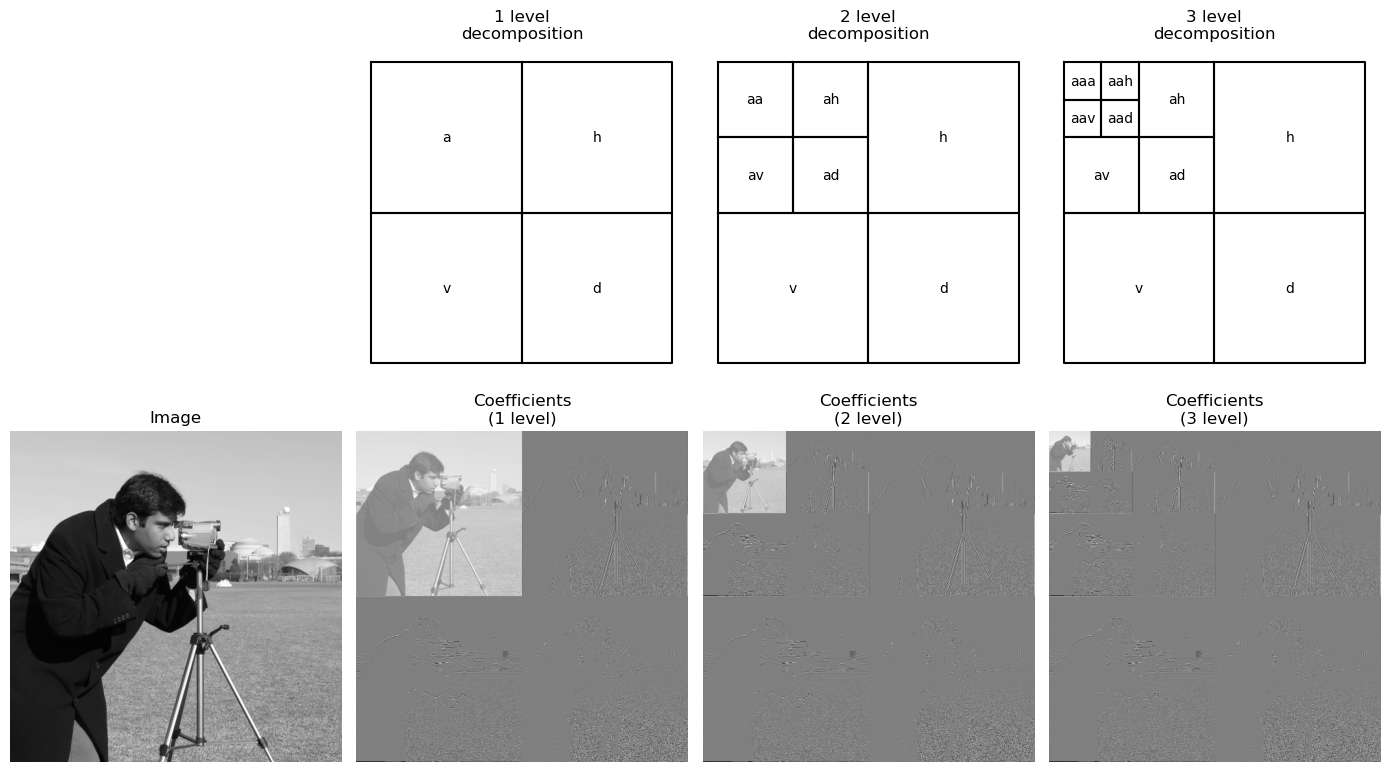

In [9]:
# wavelet transform template code
x = pywt.data.camera().astype(np.float32)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

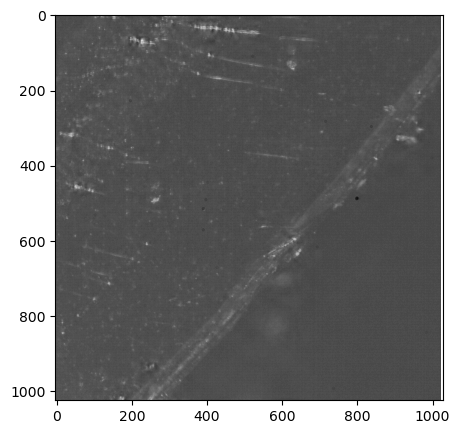

True

In [24]:
numLevel = 10
coeffsList = []
coeffsAbsList = []
wavelet = 'coif6'
padding_mode = 'periodic'

for img in imgStack:
    coeffs = pywt.wavedec2(img, wavelet, level=numLevel, mode=padding_mode)
    coeffsArr, slices = pywt.coeffs_to_array(coeffs)
    coeffsArrAbs = np.abs(coeffsArr)
    coeffsList.append(coeffsArr)
    coeffsAbsList.append(coeffsArrAbs)

coeffsAbsListArr = np.array(coeffsAbsList)
maxCoeffsIndexArr = np.argmax(coeffsAbsListArr, axis=0)

# 최대계수 저장 배열 초기화
maxCoeffsShape = coeffsList[0].shape  # 첫 번째 이미지 기준으로 계수 형태 지정
maxCoeffsArr = np.empty(maxCoeffsShape)

# reshapedIndices의 각 인덱스를 반복하면서 coeffsList에서 해당하는 최대값을 추출합니다.
for i in range(maxCoeffsShape[0]):
    for j in range(maxCoeffsShape[1]):
        index = maxCoeffsIndexArr[i][j]
        maxCoeffsArr[i][j] = coeffsList[index][i][j]

# maxCoeffsArr = np.abs(maxCoeffsArr)

# maxCoeffsArr를 웨이블릿 계수들의 시퀀스로 변환
maxCoeffs= pywt.array_to_coeffs(maxCoeffsArr,slices,output_format='wavedec2')

# maxCoeffsArr = np.array([[coeffsList[maxCoeffsIndexArr[i][j]][i][j] for j in range(maxCoeffsShape[1])] for i in range(maxCoeffsShape[0])])



# 역 웨이블릿 변환 수행하여 이미지 재구성
edofImage=pywt.waverec2(maxCoeffs,wavelet, mode=padding_mode)

show_image(edofImage)
cv2.imwrite("edofimage.png", edofImage)

In [37]:
def sub_band_consistency_check(map, coeff):
    nx = coeff.shape[0]
    ny = coeff.shape[1]

    for i in range(3):
        j = 1
        for k in range(i):
            j *= 2

        mx = nx // j
        my = ny // j

        for x in range(mx // 2, mx):
            for y in range(my // 2):
                a = map[x, y]
                b = map[x, y + my // 2]
                c = map[x - mx // 2, y + my // 2]

                if a == b:
                    if a != c:
                        map[x - mx // 2, y + my // 2] = a
                else:
                    if a == c:
                        map[x , y + my // 2] = a
                    elif b == c:
                        map[x ,y] = b
                    else:
                        va = abs(coeff[x,y])
                        vb = abs(coeff[x,y + my//2])
                        vc= abs(coeff[x-mx//2,y+my//2])

                        if va > vb and va > vc :
                            map[x - mx//2,y+my//j]=a 
                            map[x ,y+my//j]=a 
                        elif vb > va and vb > vc :
                            map [x-mx//j,y+my//j]=b 
                            map [x,y]=b 
                        elif vc>va and vc>vb :
                            map [x-mx//j ,y+my//j]=c 
                            map [x ,y]=c  


In [ ]:
sub_band_consistency_check(maxCoeffsIndexArr, maxCoeffsArr)

# maxCoeffsArr를 웨이블릿 계수들의 시퀀스로 변환
maxCoeffs= pywt.array_to_coeffs(maxCoeffsArr,slices,output_format='wavedec2')

# maxCoeffsArr = np.array([[coeffsList[maxCoeffsIndexArr[i][j]][i][j] for j in range(maxCoeffsShape[1])] for i in range(maxCoeffsShape[0])])



# 역 웨이블릿 변환 수행하여 이미지 재구성
edofImage=pywt.waverec2(maxCoeffs,wavelet, mode=padding_mode)

show_image(edofImage)
cv2.imwrite("edofimage.png", edofImage)

In [ ]:
numLevel = 5
coeffsList = []
coeffsAbsList = []
wavelet = 'db2'
padding_mode = 'periodization'

for img in imgStack:
    coeffs = pywt.wavedec2(img, wavelet, level=numLevel)
    coeffsArr, slices = pywt.coeffs_to_array(coeffs)
    coeffsArrAbs = np.abs(coeffsArr)
    coeffsList.append(coeffsArr)
    coeffsAbsList.append(coeffsArrAbs)

coeffsAbsListArr = np.array(coeffsAbsList)
maxCoeffsIndexArr = np.argmax(coeffsAbsListArr, axis=0)

# 최대coeffs 저장할 배열 초기화
maxCoeffsArr = np.empty((1024, 1024))

# reshapedIndices의 각 인덱스를 반복하면서 coeffsList에서 해당하는 최대값을 추출합니다.
for i in range(1024):
    for j in range(1024):
        index = maxCoeffsIndexArr[i][j]
        maxCoeffsArr[i][j] = coeffsList[index][i][j]

# maxCoeffsArr를 웨이블릿 계수들의 시퀀스로 변환
maxCoeffs = pywt.array_to_coeffs(maxCoeffsArr, coeff_slices=slices, output_format='wavedec2')

# 역 웨이블릿 변환 수행하여 이미지 재구성
edofImage = pywt.waverec2(maxCoeffs,wavelet)

# minVal = np.min(edofImage)
# maxVal = np.max(edofImage)
# scaleEdofImage = (edofImage - minVal) * (255/(maxVal-minVal))
# scaleEdofImageUint8 = scaleEdofImage.astype(np.uint8)

# show_image(scaleEdofImageUint8)

# cv2.imwrite("edofimage.png", scaleEdofImageUint8)
cv2.imwrite("edofimage.png", edofImage)


In [10]:
edofImage.shape

(1024, 1024)

In [ ]:
numLevel = 2
coeffsList = []
coeffsAbsList = []
wavelet = 'haar'
padding_mode = 'symmetric'

for img in imgStack:
    coeffs = pywt.wavedec2(img, wavelet=wavelet, level=numLevel, mode=padding_mode)
    coeffsArr, slices = pywt.coeffs_to_array(coeffs)
    coeffsArrAbs = np.abs(coeffsArr)
    coeffsList.append(coeffsArr)
    coeffsAbsList.append(coeffsArrAbs)

coeffsAbsListArr = np.array(coeffsAbsList)
maxCoeffsArr = np.argmax(coeffsAbsListArr)

# maxCoeffsArr를 웨이블릿 계수들의 시퀀스로 변환
maxCoeffs = pywt.array_to_coeffs(maxCoeffsArr, coeff_slices=slices, output_format='wavedec2')

# 역 웨이블릿 변환 수행하여 이미지 재구성
edofImage = pywt.waverec2(maxCoeffs,wavelet=wavelet, mode=padding_mode)
# edofImage = edofImage.astype(np.uint8)
show_image(edofImage)

cv2.imwrite("edofimage.png", edofImage)

In [53]:
def combine_focus_stack(imgStack, numLevel):
    # 초기화: 결과 이미지 생성 및 모든 픽셀을 0으로 설정
    result = np.zeros_like(imgStack[0], dtype=np.float32)
    maxCoeff = np.zeros_like(result)

    # imgStack 내의 모든 이미지에서 해당 위치의 픽셀 값 비교
    for k in range(len(imgStack)):
        # 다중 레벨 웨이블릿 변환 적용 (예시: 'haar')
        coeffs = pywt.wavedec2(imgStack[k], 'haar', level=numLevel)
        
        for level in range(1, numLevel + 1):
            # LL(저주파 영역) 세부 계수 추출 및 절대값 적용 (웨이블릿 세부 계수는 음수일 수 있음)
            LL_abs = np.abs(coeffs[level][0])

            for i in range(result.shape[0]):
                for j in range(result.shape[1]):
                    if i < LL_abs.shape[0] and j < LL_abs.shape[1]:
                        if LL_abs[i, j] > maxCoeff[i, j]:
                            maxCoeff[i, j] = LL_abs[i, j]
                            result[i, j] = imgStack[k][i, j]

    return result.astype(np.uint8)

def decompose_image(result, num_levels):
    # 초기화: 결과 이미지 크기에 맞는 배열 생성 및 모든 계수를 0으로 설정
    coeffs = [np.zeros_like(result)]

    # 다중 레벨 웨이블릿 계수 생성
    for level in range(1, num_levels + 1):
        coeffs.append((coeffs[level - 1], None))

    # 역 웨이블릿 변환 적용 (예시: 'haar')
    reconstructed = pywt.waverec2(coeffs, 'haar')

    return reconstructed.astype(np.uint8)


In [ ]:
coeffs = combine_focus_stack(imgStack, 2)
edofImage = decompose_image(coeffs,2)
show_image(edofImage)


In [ ]:
# 초기화: 결과 이미지 생성 및 모든 픽셀을 0으로 설정
result = np.zeros_like(imgStack[0], dtype=np.float32)
maxCoeff = np.zeros_like(result)

numLevel = 10
# imgStack내의 모든 이미지에서 해당 위치의 픽셀 값 비교
for k in range(len(imgStack)):
    # 다중 레벨 웨이블릿 변환 적용 (예시: 'haar')
    coeffs = pywt.wavedec2(imgStack[k], 'haar', level=numLevel)
    for level in range(1, numLevel + 1):
        # LL(저주파 영역) 세부 계수 추출 및 절대값 적용 (웨이블릿 세부 계수는 음수일 수 있음)
            LL_abs = np.abs(coeffs[level][0])

            for i in range(result.shape[0]):
                for j in range(result.shape[1]):
                    if LL_abs[i, j] > maxCoeff[i, j]:
                        maxCoeff[i, j] = LL_abs[i, j]
                        result[i, j] = imgStack[k][i, j]

In [ ]:
def combine_focus_stack(stack, num_levels):
    # 초기화: 결과 이미지 생성 및 모든 픽셀을 0으로 설정
    result = np.zeros_like(stack[0], dtype=np.float32)
    max_coeff = np.zeros_like(result)

    # 스택 내의 모든 이미지에서 해당 위치의 픽셀 값 비교
    for k in range(len(stack)):
        # 다중 레벨 웨이블릿 변환 적용 (예시: 'haar')
        coeffs = pywt.wavedec2(stack[k], 'haar', level=num_levels)

        for level in range(1, num_levels + 1):
            # LL(저주파 영역) 세부 계수 추출 및 절대값 적용 (웨이블릿 세부 계수는 음수일 수 있음)
            LL_abs = np.abs(coeffs[level][0])

            for i in range(result.shape[0]):
                for j in range(result.shape[1]):
                    if LL_abs[i, j] > max_coeff[i, j]:
                        max_coeff[i, j] = LL_abs[i, j]
                        result[i, j] = stack[k][i, j]

    return result.astype(np.uint8)

def decompose_image(result, num_levels):
    # 초기화: 결과 이미지 크기에 맞는 배열 생성 및 모든 계수를 0으로 설정
    coeffs = [np.zeros_like(result)]

    # 다중 레벨 웨이블릿 계수 생성
    for level in range(1, num_levels + 1):
        coeffs.append((coeffs[level - 1], None))

    # 역 웨이블릿 변환 적용 (예시: 'haar')
    reconstructed = pywt.waverec2(coeffs, 'haar')

    return reconstructed.astype(np.uint8)